In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/content/HousingData.csv")

In [8]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,12.715432,36.2


In [4]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [15]:
# Step 3: Feature Selection
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns.tolist())

# Keep only selected features
X = df[selected_columns]


Selected Features: ['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [16]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (404, 8)
Test shape: (102, 8)


In [17]:
# Step 5: Train Models
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [18]:
# Step 6: Evaluate Models
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R² Score:", r2_score(y_test, lr_preds))

print("\nRandom Forest:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))


Linear Regression:
MSE: 26.025597223115906
R² Score: 0.6451076693231752

Random Forest:
MSE: 12.099538843137262
R² Score: 0.8350073005686186


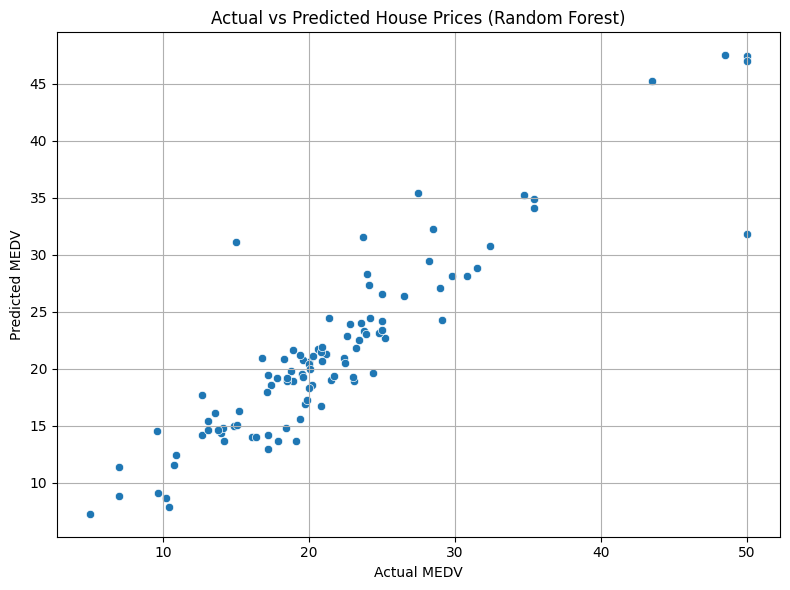

In [19]:
# Step 7: Visualize Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_preds)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()
